In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/manit/OneDrive/Desktop/Masters/Spring20/Sabir/data')
df = pd.read_csv("sgemm_product.csv")
pd.DataFrame.rename(df,columns={'Run1 (ms)':'Run1','Run2 (ms)':'Run2','Run3 (ms)':'Run3', 'Run4 (ms)':'Run4'},inplace =True)
df['AverageRun']=df.apply(lambda row:(row.Run1+row.Run2+row.Run3+row.Run4)/4,axis=1)
df = df.drop(["Run1","Run2","Run3","Run4"], axis=1)
mean_run=np.mean(df["AverageRun"],axis=0)
print(mean_run)
df["run_class"]=np.where(df['AverageRun']>=mean_run, 1, 0)

217.571953093958


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## KNN Library
from sklearn.neighbors import KNeighborsClassifier
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
### Keras and Tensor flow libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [3]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

In [4]:
df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,AverageRun,run_class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.8175,0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.0350,0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.1600,0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.4525,0


In [5]:
##Splitting the Dataset 
train_data, test_data = train_test_split(df, test_size = 0.3, random_state = 20)
y_train=train_data['run_class']
y_test=test_data['run_class']
x_train=train_data[['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN','STRM','STRN','SA','SB']]
x_test=test_data[['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN','STRM','STRN','SA','SB']]
## Feature Scaling the train dataset
fea_scaling = preprocessing.StandardScaler().fit(x_train[['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN','STRM','STRN','SA','SB']])
X_train = fea_scaling.transform(x_train[['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN','STRM','STRN','SA','SB']])
## Feature scaling the test dataset
fea_scaling = preprocessing.StandardScaler().fit(x_test[['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN','STRM','STRN','SA','SB']])
X_test = fea_scaling.transform(x_test[['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN','STRM','STRN','SA','SB']])        

0.2952459791863765
[[39254 85501]
 [33687 10678]]


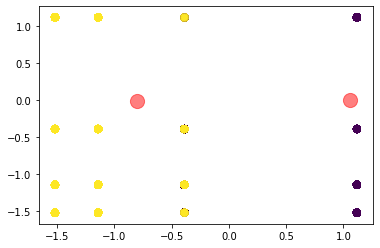

In [6]:
## K-Means Clustering Algorithm 
## Train Accuracy and Train Plot 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(X_train)):
    predict_me = np.array(X_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(X_train))
yp=kmeans.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
print(confusion_matrix(y,yp))

0.2956815673289183
[[16806 36892]
 [14157  4625]]


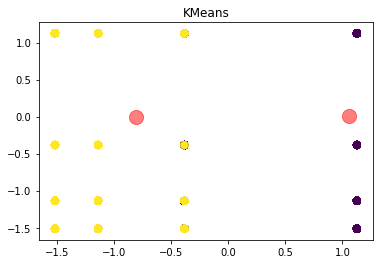

In [7]:
## Test Accuracy and Test Plot
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(X_test)):
    predict_me = np.array(X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(X_test))
yp=kmeans.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')
print(confusion_matrix(y,yp))

In [8]:
## Feature Selection
### Forward Selection 
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=12,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=2)
features = feature_selector.fit(X_train,y_train)
filtered_features= x_train.columns[list(features.k_feature_idx_)]  
filtered_features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in

C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.6s finished

[2020-05-06 08:35:26] Features: 6/12 -- score: 0.9872088634429126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\m

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished

[2020-05-06 08:35:45] Features: 12/12 -- score: 0.9981325196364916

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'KWI', 'VWM', 'VWN', 'STRM',
       'STRN', 'SA', 'SB'],
      dtype='object')

In [9]:
## Performing PCA, ICA and Randomized Projections
x=x_train[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'KWI', 'VWM', 'VWN', 'STRM',
       'STRN', 'SA', 'SB']]
xt=x_test[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'KWI', 'VWM', 'VWN', 'STRM',
       'STRN', 'SA', 'SB']]
x= preprocessing.StandardScaler().fit_transform(x)
xt= preprocessing.StandardScaler().fit_transform(xt)
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca_train =pca.fit_transform(x)
pca_test=pca.fit_transform(xt)
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6)
ica_train =ica.fit_transform(x)
ica_test=ica.fit_transform(xt)
from sklearn.random_projection import GaussianRandomProjection
rca = GaussianRandomProjection(n_components=6, eps=1, random_state=420)
rca_train =rca.fit_transform(x)
rca_test=rca.fit_transform(xt)

0.3534886471144749


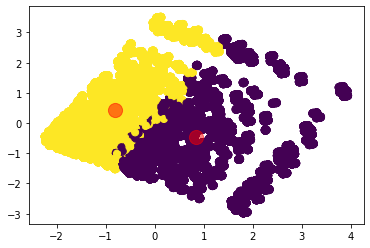

In [10]:
## K-Means Clustering Algorithm using PCA
## Train Accuracy and Train Plot 
kmeans.fit(pca_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(pca_train)):
    predict_me = np.array(pca_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(pca_train))
yp=kmeans.predict(pca_train)
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

0.5865342163355408


Text(0.5, 1.0, 'KMeans')

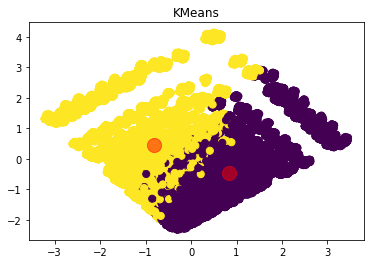

In [11]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(pca_test)):
    predict_me = np.array(pca_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(pca_test))
yp=kmeans.predict(pca_test)
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.4085087511825922


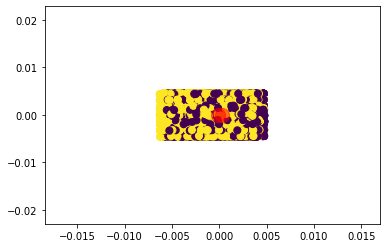

In [12]:
## K-Means Clustering Algorithm using ICA
## Train Accuracy and Train Plot 
kmeans.fit(ica_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(ica_train)):
    predict_me = np.array(ica_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(ica_train))
yp=kmeans.predict(ica_train)
plt.scatter(ica_train[:, 0], ica_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

0.3318846578366446


Text(0.5, 1.0, 'KMeans')

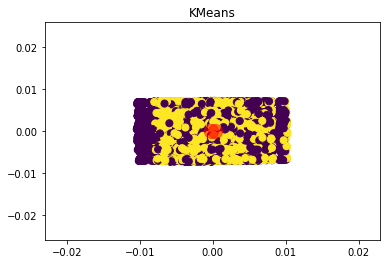

In [13]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(ica_test)):
    predict_me = np.array(ica_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(ica_test))
yp=kmeans.predict(ica_test)
plt.scatter(ica_test[:, 0], ica_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.5579115421002838


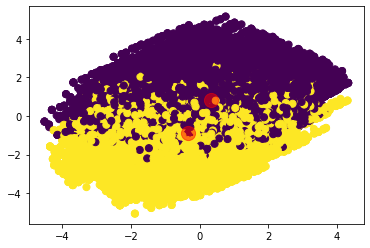

In [14]:
## K-Means Clustering Algorithm using RCA
## Train Accuracy and Train Plot 
kmeans.fit(rca_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(rca_train)):
    predict_me = np.array(rca_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(rca_train))
yp=kmeans.predict(rca_train)
plt.scatter(rca_train[:, 0], rca_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

0.5561534216335541


Text(0.5, 1.0, 'KMeans')

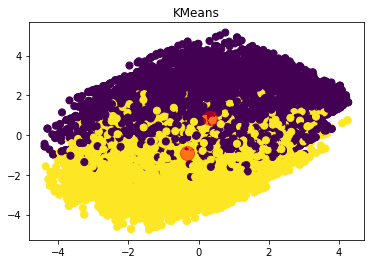

In [15]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(rca_test)):
    predict_me = np.array(rca_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(rca_test))
yp=kmeans.predict(rca_test)
plt.scatter(rca_test[:, 0], rca_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

In [16]:
input_shap=6
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(20, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(pca_train, y_train, batch_size = 10, epochs = 10)
y_predict = classifier.predict(pca_test)
y_predict = np.where(y_predict > 0.5,1,0)
y_test_array=np.array(y_test)
y_test_array= y_test_array.astype(float)
print(confusion_matrix(y_test_array,y_predict))  
print(classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print(acc_score)
y_predict_train=classifier.predict(pca_train)
y_predict_train = np.where(y_predict_train > 0.5,1,0)
y_train_array=np.array(y_train)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/10
169120/169120 [==============================] - 16s 97us/step - loss: 0.3040 - accuracy: 0.8659
Epoch 2/10
169120/169120 [==============================] - 15s 88us/step - loss: 0.2334 - accuracy: 0.8985
Epoch 3/10
169120/169120 [==============================] - 15s 87us/step - loss: 0.1879 - accuracy: 0.9194
Epoch 4/10
169120/169120 [==============================] - 14s 83us/step - loss: 0.1693 - accuracy: 0.9263
Epoch 5/10
169120/169120 [==============================] - 14s 82us/step - loss: 0.1622 - accuracy: 0.9288
Epoch 6/10
169120/169120 [==============================] - 14s 84us/step - loss: 0.1561 - accuracy: 0.9311
Epoch 7/10
169120/169120 [==============================] - 15s 89us/step - loss: 0.1520 - accuracy: 0.9325
Epoch 8/10
169120/169120 [==============================] - 15s 87us/step - loss: 0.1490 - accuracy: 0.9335
Epoch 9/10
169120/169120 [==============================] - 15s 90us/step - loss: 0.1463 - accuracy: 0.9339
Epoch 10/10
169120/169120 [=

Text(0.5, 1.0, 'Train and Test Accuracy for various Models')

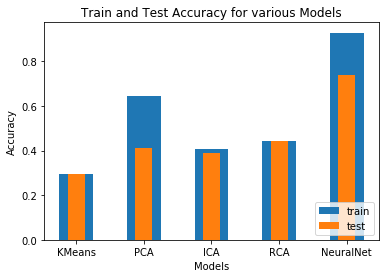

In [17]:
 ### Train and Test Error graph between all the algorithms
train_accuracy = [0.2952,0.6465,0.4066,0.4421,0.9290]
test_accuracy=[0.2956,0.4134,0.3910,0.4438,0.7381]
Models =['KMeans','PCA','ICA','RCA','NeuralNet']
plt.bar(Models,train_accuracy,label='train',width=0.5)
plt.bar(Models,test_accuracy,label='test',width=0.25)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Models")

[[32698 92057]
 [11892 32473]]
0.3853535950804163


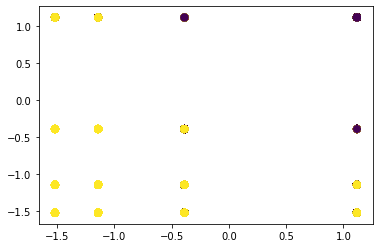

In [18]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
y=np.array(y_train)
y=y.astype(float)
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(X_train)
em_pred = em.predict(X_train)
em_probs = em.predict_proba(X_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=50, cmap='viridis_r')

[[13988 39710]
 [ 4974 13808]]
0.3834988962472406


Text(0.5, 1.0, 'Expectation Maximization')

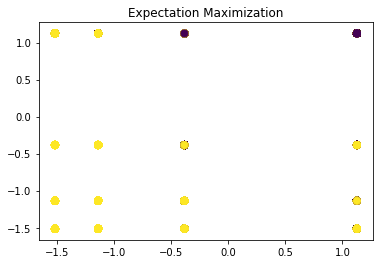

In [19]:
## Expectation maximization analysis on Test set
y=np.array(y_test)
y=y.astype(float)
em_pred1 = em.predict(X_test)
em_probs1 = em.predict_proba(X_test)
print(confusion_matrix(y,em_pred1))
print(accuracy_score(y,em_pred1))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[86939 37816]
 [16145 28220]]
0.6809307000946074


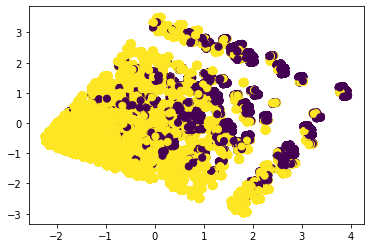

In [20]:
### Analysis for pca data
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(pca_train)
em_pred = em.predict(pca_train)
em_probs = em.predict_proba(pca_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y, s=50, cmap='viridis_r')

[[37798 15900]
 [ 6341 12441]]
0.69314293598234


Text(0.5, 1.0, 'Expectation Maximization')

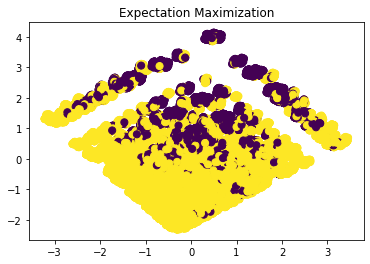

In [21]:
## Test Data 
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(pca_test)
em_probs = em.predict_proba(pca_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[59198 65557]
 [21675 22690]]
0.48420056764427627


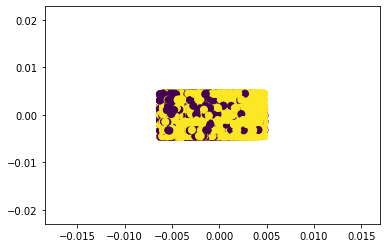

In [22]:
## Analysis of ICA
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(ica_train)
em_pred = em.predict(ica_train)
em_probs = em.predict_proba(ica_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(ica_train[:, 0], ica_train[:, 1], c=y, s=50, cmap='viridis_r')

[[24109 29589]
 [11340  7442]]
0.43530629139072846


Text(0.5, 1.0, 'Expectation Maximization')

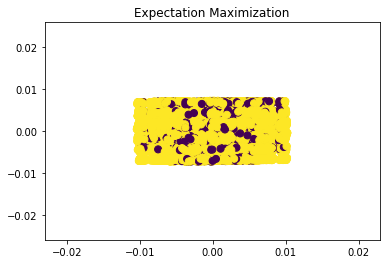

In [23]:
## Test Data
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(ica_test)
em_probs = em.predict_proba(ica_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(ica_test[:, 0], ica_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[52484 72271]
 [25872 18493]]
0.41968424787133396


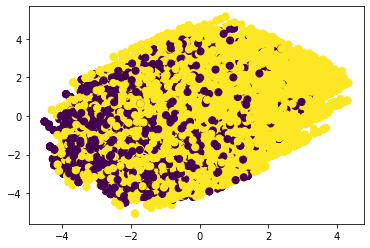

In [24]:
## Analysis of RCA
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(rca_train)
em_pred = em.predict(rca_train)
em_probs = em.predict_proba(rca_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(rca_train[:, 0], rca_train[:, 1], c=y, s=50, cmap='viridis_r')

[[22785 30913]
 [10854  7928]]
0.42374448123620306


Text(0.5, 1.0, 'Expectation Maximization')

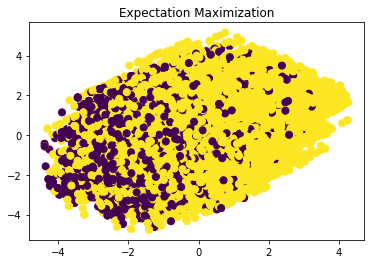

In [25]:
## Test Data
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(rca_test)
em_probs = em.predict_proba(rca_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(rca_test[:, 0], rca_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

In [26]:
input_shap=6
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(20, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(pca_train, y_train, batch_size = 10, epochs = 10)
y_predict = classifier.predict(pca_test)
y_predict = np.where(y_predict > 0.5,1,0)
y_test_array=np.array(y_test)
y_test_array= y_test_array.astype(float)
print(confusion_matrix(y_test_array,y_predict))  
print(classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print(acc_score)
y_predict_train=classifier.predict(pca_train)
y_predict_train = np.where(y_predict_train > 0.5,1,0)
y_train_array=np.array(y_train)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/10
169120/169120 [==============================] - 14s 83us/step - loss: 0.3040 - accuracy: 0.8645
Epoch 2/10
169120/169120 [==============================] - 14s 85us/step - loss: 0.2574 - accuracy: 0.8865
Epoch 3/10
169120/169120 [==============================] - 15s 86us/step - loss: 0.2160 - accuracy: 0.9073
Epoch 4/10
169120/169120 [==============================] - 15s 86us/step - loss: 0.1961 - accuracy: 0.9164
Epoch 5/10
169120/169120 [==============================] - 15s 86us/step - loss: 0.1819 - accuracy: 0.9210
Epoch 6/10
169120/169120 [==============================] - 14s 86us/step - loss: 0.1725 - accuracy: 0.9252
Epoch 7/10
169120/169120 [==============================] - 15s 87us/step - loss: 0.1617 - accuracy: 0.9288
Epoch 8/10
169120/169120 [==============================] - 15s 87us/step - loss: 0.1537 - accuracy: 0.9315
Epoch 9/10
169120/169120 [==============================] - 15s 87us/step - loss: 0.1483 - accuracy: 0.9339
Epoch 10/10
169120/169120 [=

Text(0.5, 1.0, 'Train and Test Accuracy for various Models')

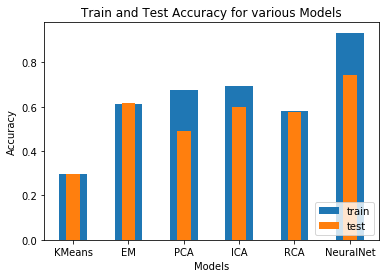

In [27]:
### Train and Test Error graph between all the algorithms (expectation maximization)
train_accuracy = [0.2952,0.6133,0.6767,0.6956,0.5803,0.9337]
test_accuracy=[0.2956,0.6168,0.4911,0.5988,0.5763,0.7447]
Models =['KMeans','EM','PCA','ICA','RCA','NeuralNet']
plt.bar(Models,train_accuracy,label='train',width=0.5)
plt.bar(Models,test_accuracy,label='test',width=0.25)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Models")